# HR ANALYTICS CAPSTONE PROJECT

NAME: VAIBHAV TAYADE
contact details: 8087970061
EmailId : vaibhav_t29@rediffmail.com
                

In [1]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore
import sklearn
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# IMPORTING DATASET:

In [2]:
# reading csv file and creating dataframe:

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

# keeping one copy of dataset for EDA analysis, which doesnt have labelencoded data.
df_old = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
# checking column headings:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
# Rearranging columns and removing irrelevant column.
# we removed 'Over18' column as it has same data throughout the column.

df = df[['Age', 'Gender', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition']]

In [5]:
# checking details of the dataset.

df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

Observation:
There are few columns, like 'DistanceFromHome' and 'TotalWorkingYears' etc., where Mean values are higher than Median values, which indicates presence of outliers in the datasets.

# UNDERSTANDING PROBLEM STATEMENT:

Here, in this dataset, we can see that we have to find the impact of various Features on Attrition of the Employee. We have to see how they relate with eachother and with Attrition data as well.

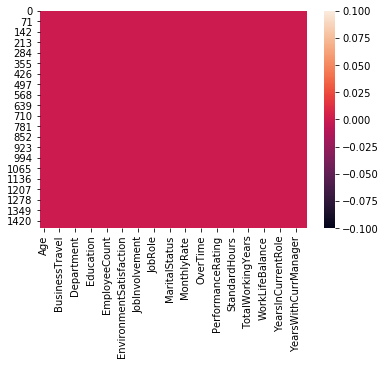

In [6]:
# checking null values using heatmap.

sns.heatmap(df.isnull())

Observation:

    There are no NULL values present in the dataset.

In [7]:
# checking count of null values if any:
df.isnull().sum()

Age                         0
Gender                      0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition 

In [8]:
# checking skewness in the dataset.

df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

Observation:
 
Skewness can be seen in the columns like DistanceFromHome, JobLevel, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, StockOptionLevel, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearsWithCurrManager 

# ENCODING THE CATEGORICAL DATASETS:

In [9]:
LE = LabelEncoder()
df['Attrition'] = LE.fit_transform(df['Attrition'])
df['BusinessTravel'] = LE.fit_transform(df['BusinessTravel'])
df['Department'] = LE.fit_transform(df['Department'])
df['EducationField'] = LE.fit_transform(df['EducationField'])
df['Gender'] = LE.fit_transform(df['Gender'])
df['JobRole'] = LE.fit_transform(df['JobRole'])
df['MaritalStatus'] = LE.fit_transform(df['MaritalStatus'])
df['OverTime'] = LE.fit_transform(df['OverTime'])

# CHECKING OUTLIERS:

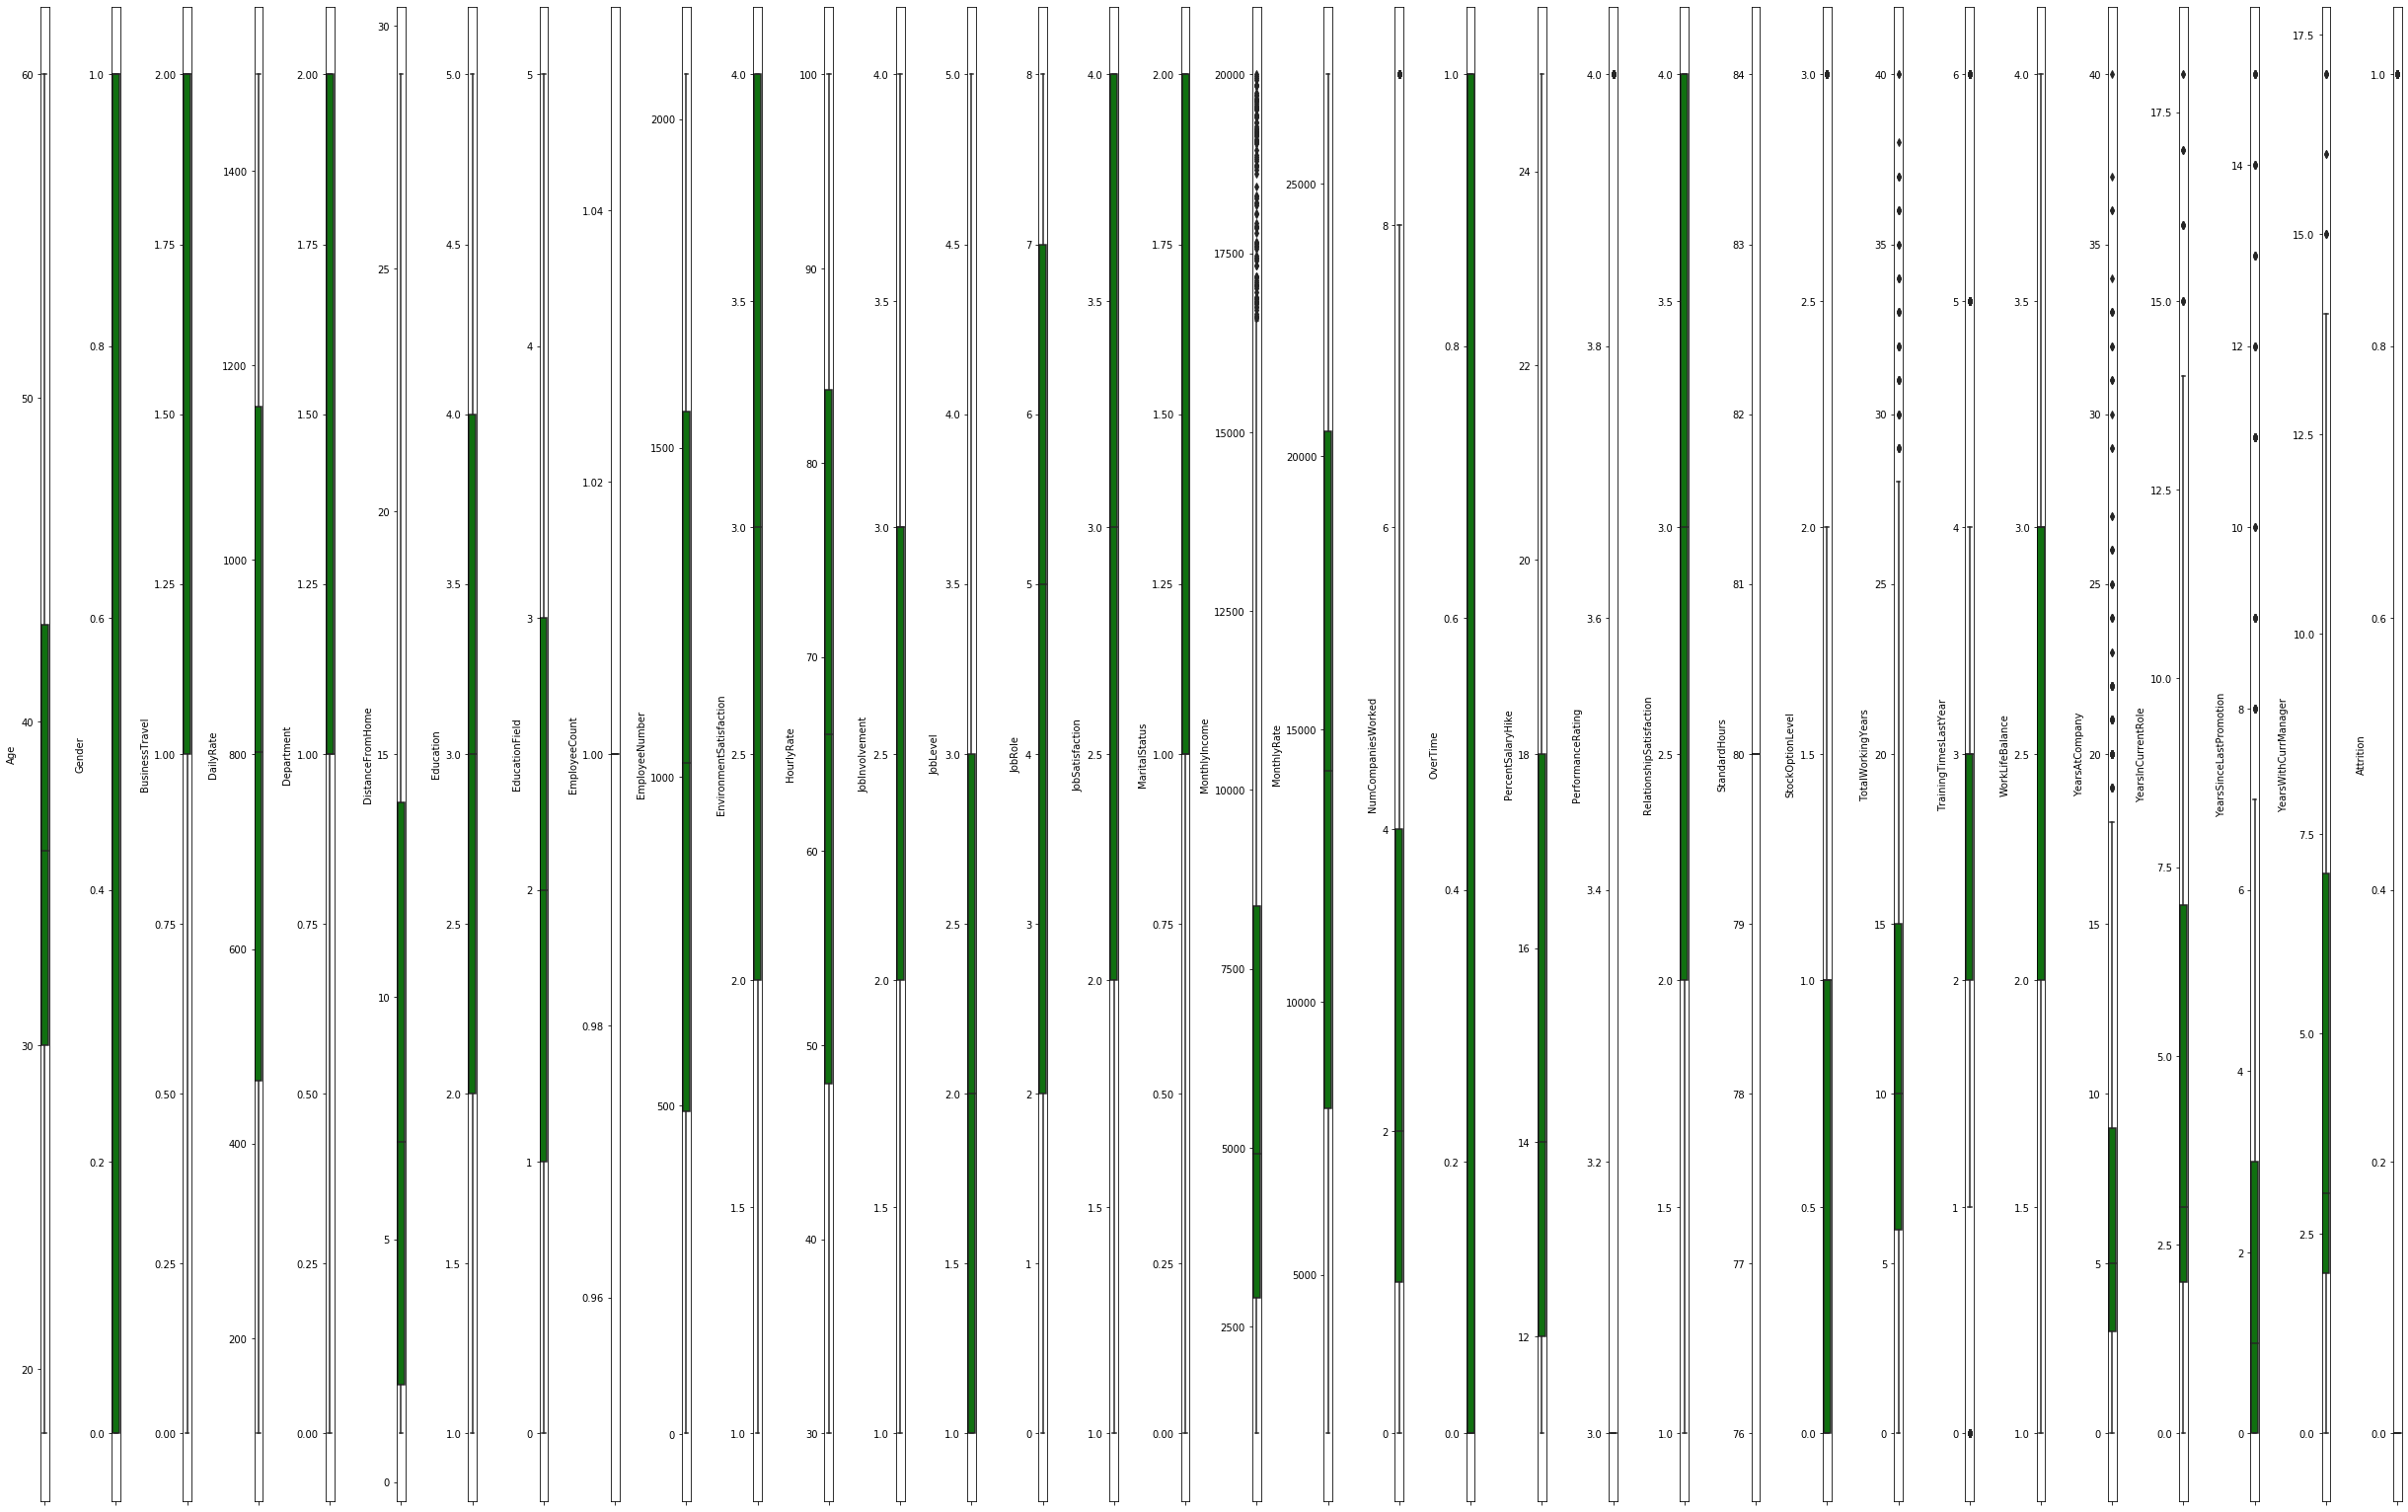

In [10]:
# checking outliers presence in individual columns using boxplots.

column_list = df.columns.values
ncol=34
nrows=8

plt.figure(figsize=(ncol,5*ncol))
for i in range(0, len(column_list)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(df[column_list[i]],color='green',orient='v')
    plt.tight_layout()

Observation:
From the above boxplot of all columns from the dataset, we can see that there are outliers present in the columns like MonthlyIncome, NumCompaniesWorked, PerformanceRating, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager.             

# CHECKING SKEWNESS.

In [11]:
# Probably columns having outliers also have skewness in them.

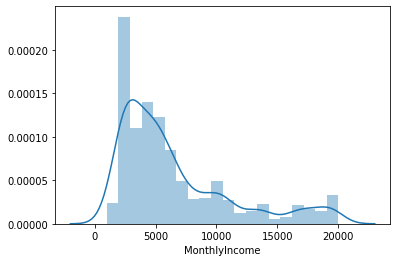

In [12]:
# 1)
sns.distplot(df['MonthlyIncome'])

Observation: Skewness present in the MonthlyIncome column.

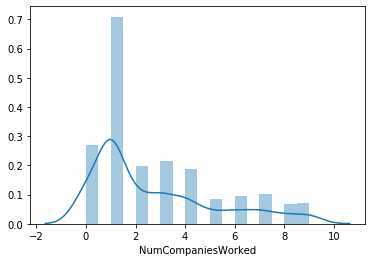

In [13]:
# 2)
sns.distplot(df['NumCompaniesWorked'])

Observation: Skewness present in the NumCompaniesWorked column.

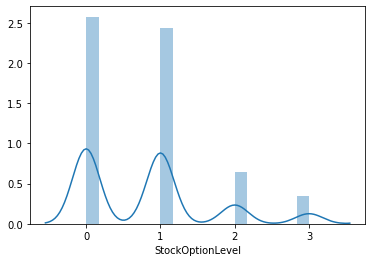

In [14]:
# 3)
sns.distplot(df['StockOptionLevel'])

Observation: Skewness present in the StockOptionLevel column.

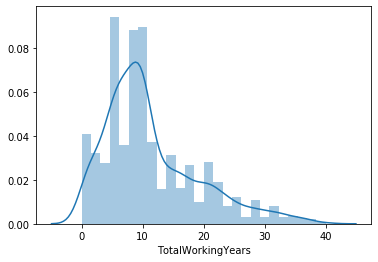

In [15]:
# 4)
sns.distplot(df['TotalWorkingYears'])

Observation: Skewness present in the TotalWorkingYears column.

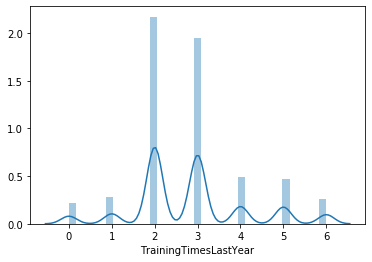

In [16]:
# 5)
sns.distplot(df['TrainingTimesLastYear'])

Observation: Skewness present in the TrainingTimesLastYear column.

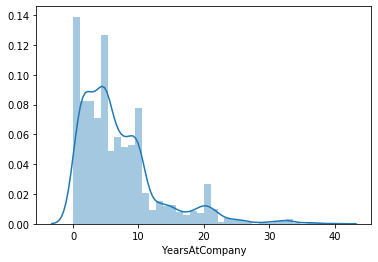

In [17]:
# 6)
sns.distplot(df['YearsAtCompany'])

Observation: Skewness present in the YearsAtCompany column.

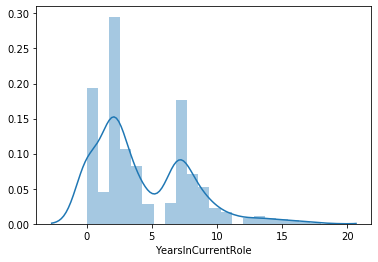

In [18]:
# 7)
sns.distplot(df['YearsInCurrentRole'])

Observation: Skewness present in the YearsInCurrentRole column.

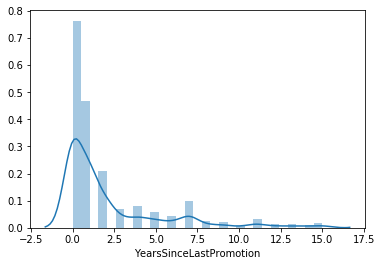

In [19]:
# 8)
sns.distplot(df['YearsSinceLastPromotion'])

Observation: Skewness present in the YearsSinceLastPromotion column.

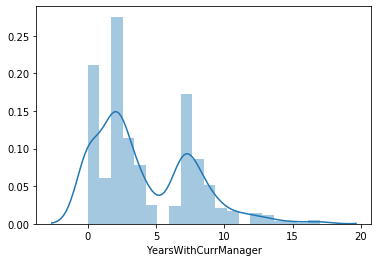

In [20]:
# 9)
sns.distplot(df['YearsWithCurrManager'])

Observation: Skewness present in the YearsWithCurrManager column.

# BIVARIATE ANALYSIS:

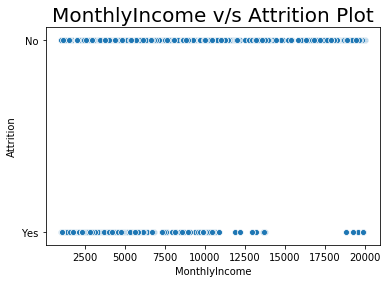

In [21]:
# scatter plot - 1 >>>

plt.title('MonthlyIncome v/s Attrition Plot', fontsize = 20)
sns.scatterplot(df_old['MonthlyIncome'], df_old['Attrition'])

Observation:  From the above scatter plot, we can say that most of the employees having high monthly income have not been through attrition phase, whereas those employees having less monthly salary have gone through attrition phase.

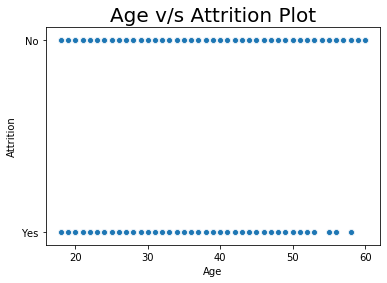

In [22]:
# scatter plot - 1 >>>

plt.title('Age v/s Attrition Plot', fontsize = 20)
sns.scatterplot(df_old['Age'], df_old['Attrition'])

Observation:  From the above scatter plot, we can say that most of the employees who are older in age have not been through attrition phase, whereas those employees belonging to young age group have gone through attrition phase.

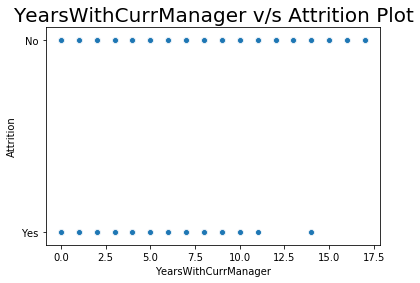

In [23]:
plt.title('YearsWithCurrManager v/s Attrition Plot', fontsize = 20)
sns.scatterplot(df_old['YearsWithCurrManager'], df_old['Attrition'])

Observation:  From the above scatter plot, we can say that most of the employees who have stayed for more number of years with their current manager have not been through attrition phase, whereas those employees who have stayed less number of years with their current manager have gone through attrition phase.

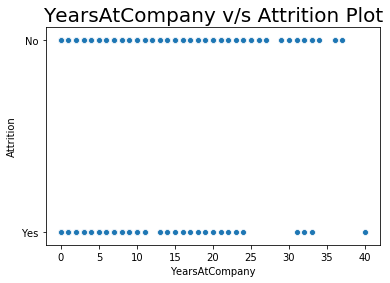

In [24]:
plt.title('YearsAtCompany v/s Attrition Plot', fontsize = 20)
sns.scatterplot(df_old['YearsAtCompany'], df_old['Attrition'])

Observation:  From the above scatter plot, we can say that most of the employees who have stayed for more number of years in the company have not gone through attrition phase, whereas those employees who have stayed less number of years in the company have gone through attrition phase.

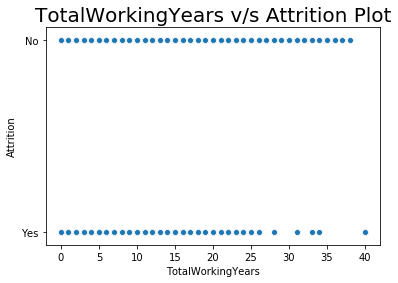

In [25]:
plt.title('TotalWorkingYears v/s Attrition Plot', fontsize = 20)
sns.scatterplot(df_old['TotalWorkingYears'], df_old['Attrition'])

Observation:  From the above scatter plot, we can say that most of the employees who have more total workings years have not gone through attrition phase, whereas those employees who have less total working years have gone through attrition phase.

# Correlation Matrix:

In [26]:
dscor = df.corr()
dscor

Age    Gender  BusinessTravel  DailyRate  \
Age                       1.000000 -0.036311        0.024751   0.010661   
Gender                   -0.036311  1.000000       -0.032981  -0.011716   
BusinessTravel            0.024751 -0.032981        1.000000  -0.004086   
DailyRate                 0.010661 -0.011716       -0.004086   1.000000   
Department               -0.031882 -0.041583       -0.009044   0.007109   
DistanceFromHome         -0.001686 -0.001851       -0.024469  -0.004985   
Education                 0.208034 -0.016547        0.000757  -0.016806   
EducationField           -0.040873 -0.002504        0.023724   0.037709   
EmployeeCount                  NaN       NaN             NaN        NaN   
EmployeeNumber           -0.010145  0.022556       -0.015578  -0.050990   
EnvironmentSatisfaction   0.010146  0.000508        0.004174   0.018355   
HourlyRate                0.024287 -0.000478        0.026528   0.023381   
JobInvolvement            0.029820  0.017960        0.039062   0.046135   
JobLevel                  0.509604 -0.039403        0.019311   0.002966   
JobRole                  -0.122427 -0.039723        0.002724  -0.009472   
JobSatisfaction          -0.004892  0.033252       -0.033962   0.030571   
MaritalStatus            -0.095029 -0.047183        0.024001  -0.069586   
MonthlyIncome             0.497855 -0.031858        0.034319   0.007707   
MonthlyRate               0.028051 -0.041482       -0.014107  -0.032182   
NumCompaniesWorked        0.299635 -0.039147        0.020875   0.038153   
OverTime                  0.028062 -0.041924        0.016543   0.009135   
PercentSalaryHike         0.003634  0.002733       -0.029377   0.022704   
PerformanceRating         0.001904 -0.013859       -0.026341   0.000473   
RelationshipSatisfaction  0.053535  0.022868       -0.035986   0.007846   
StandardHours                  NaN       NaN             NaN        NaN   
StockOptionLevel          0.037510  0.012716       -0.016727   0.042143   
TotalWorkingYears         0.680381 -0.046881        0.034226   0.014515   
TrainingTimesLastYear    -0.019621 -0.038787        0.015240   0.002453   
WorkLifeBalance          -0.021490 -0.002753       -0.011256  -0.037848   
YearsAtCompany            0.311309 -0.029747       -0.014575  -0.034055   
YearsInCurrentRole        0.212901 -0.041483       -0.011497   0.009932   
YearsSinceLastPromotion   0.216513 -0.026985       -0.032591  -0.033229   
YearsWithCurrManager      0.202089 -0.030599       -0.022636  -0.026363   
Attrition                -0.159205  0.029453        0.000074  -0.056652   

                          Department  DistanceFromHome  Education  \
Age                        -0.031882         -0.001686   0.208034   
Gender                     -0.041583         -0.001851  -0.016547   
BusinessTravel             -0.009044         -0.024469   0.000757   
DailyRate                   0.007109         -0.004985  -0.016806   
Department                  1.000000          0.017225   0.007996   
DistanceFromHome            0.017225          1.000000   0.021042   
Education                   0.007996          0.021042   1.000000   
EducationField              0.013720          0.002013  -0.039592   
EmployeeCount                    NaN               NaN        NaN   
EmployeeNumber             -0.010895          0.032916   0.042070   
EnvironmentSatisfaction    -0.019395         -0.016075  -0.027128   
HourlyRate                 -0.004144          0.031131   0.016775   
JobInvolvement             -0.024586          0.008783   0.042438   
JobLevel                    0.101963          0.005303   0.101589   
JobRole                     0.662431         -0.001015   0.004236   
JobSatisfaction             0.021001         -0.003669  -0.011296   
MaritalStatus               0.056073         -0.014437   0.004053   
MonthlyIncome               0.053130         -0.017014   0.094961   
MonthlyRate                 0.023642          0.027473  -0.026084   
NumCompaniesWorked       

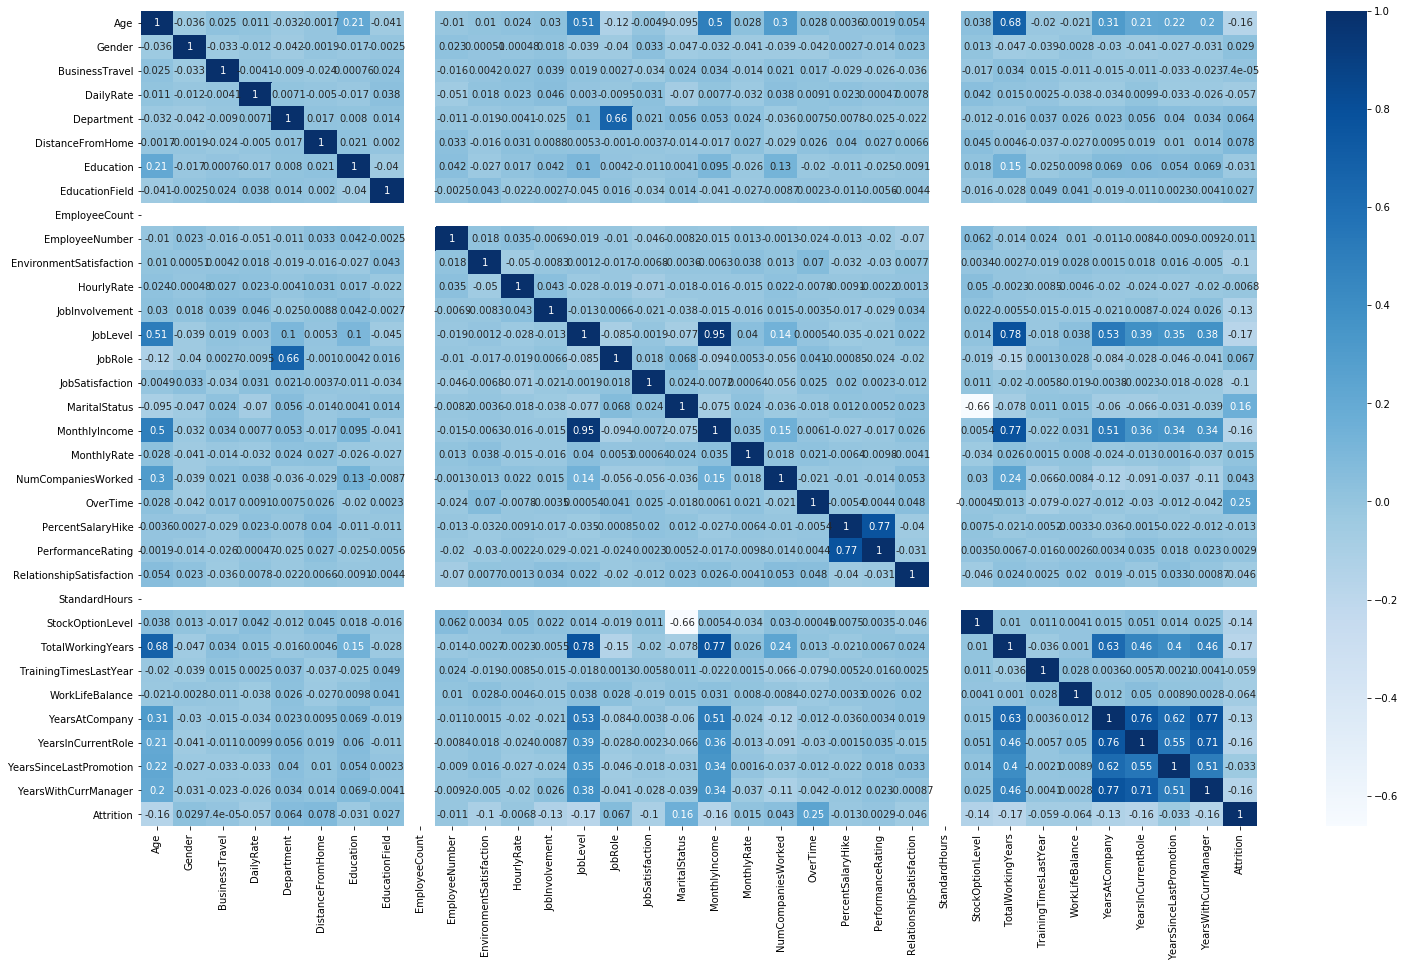

In [79]:
# checking correlation matrix using heatmap

plt.figure(figsize=(25,15))
sns.heatmap(dscor,cmap='Blues', annot=True)

Observation:
    From the above correlation plot, we can say that Maritial status column, OverTime column is very much possitively correlated with Attition.
    and columns like Age, JobInvovement, JobLevel, MonthlyIncome, StockOptionLevel, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole and YearsWithCurrentManager.
    

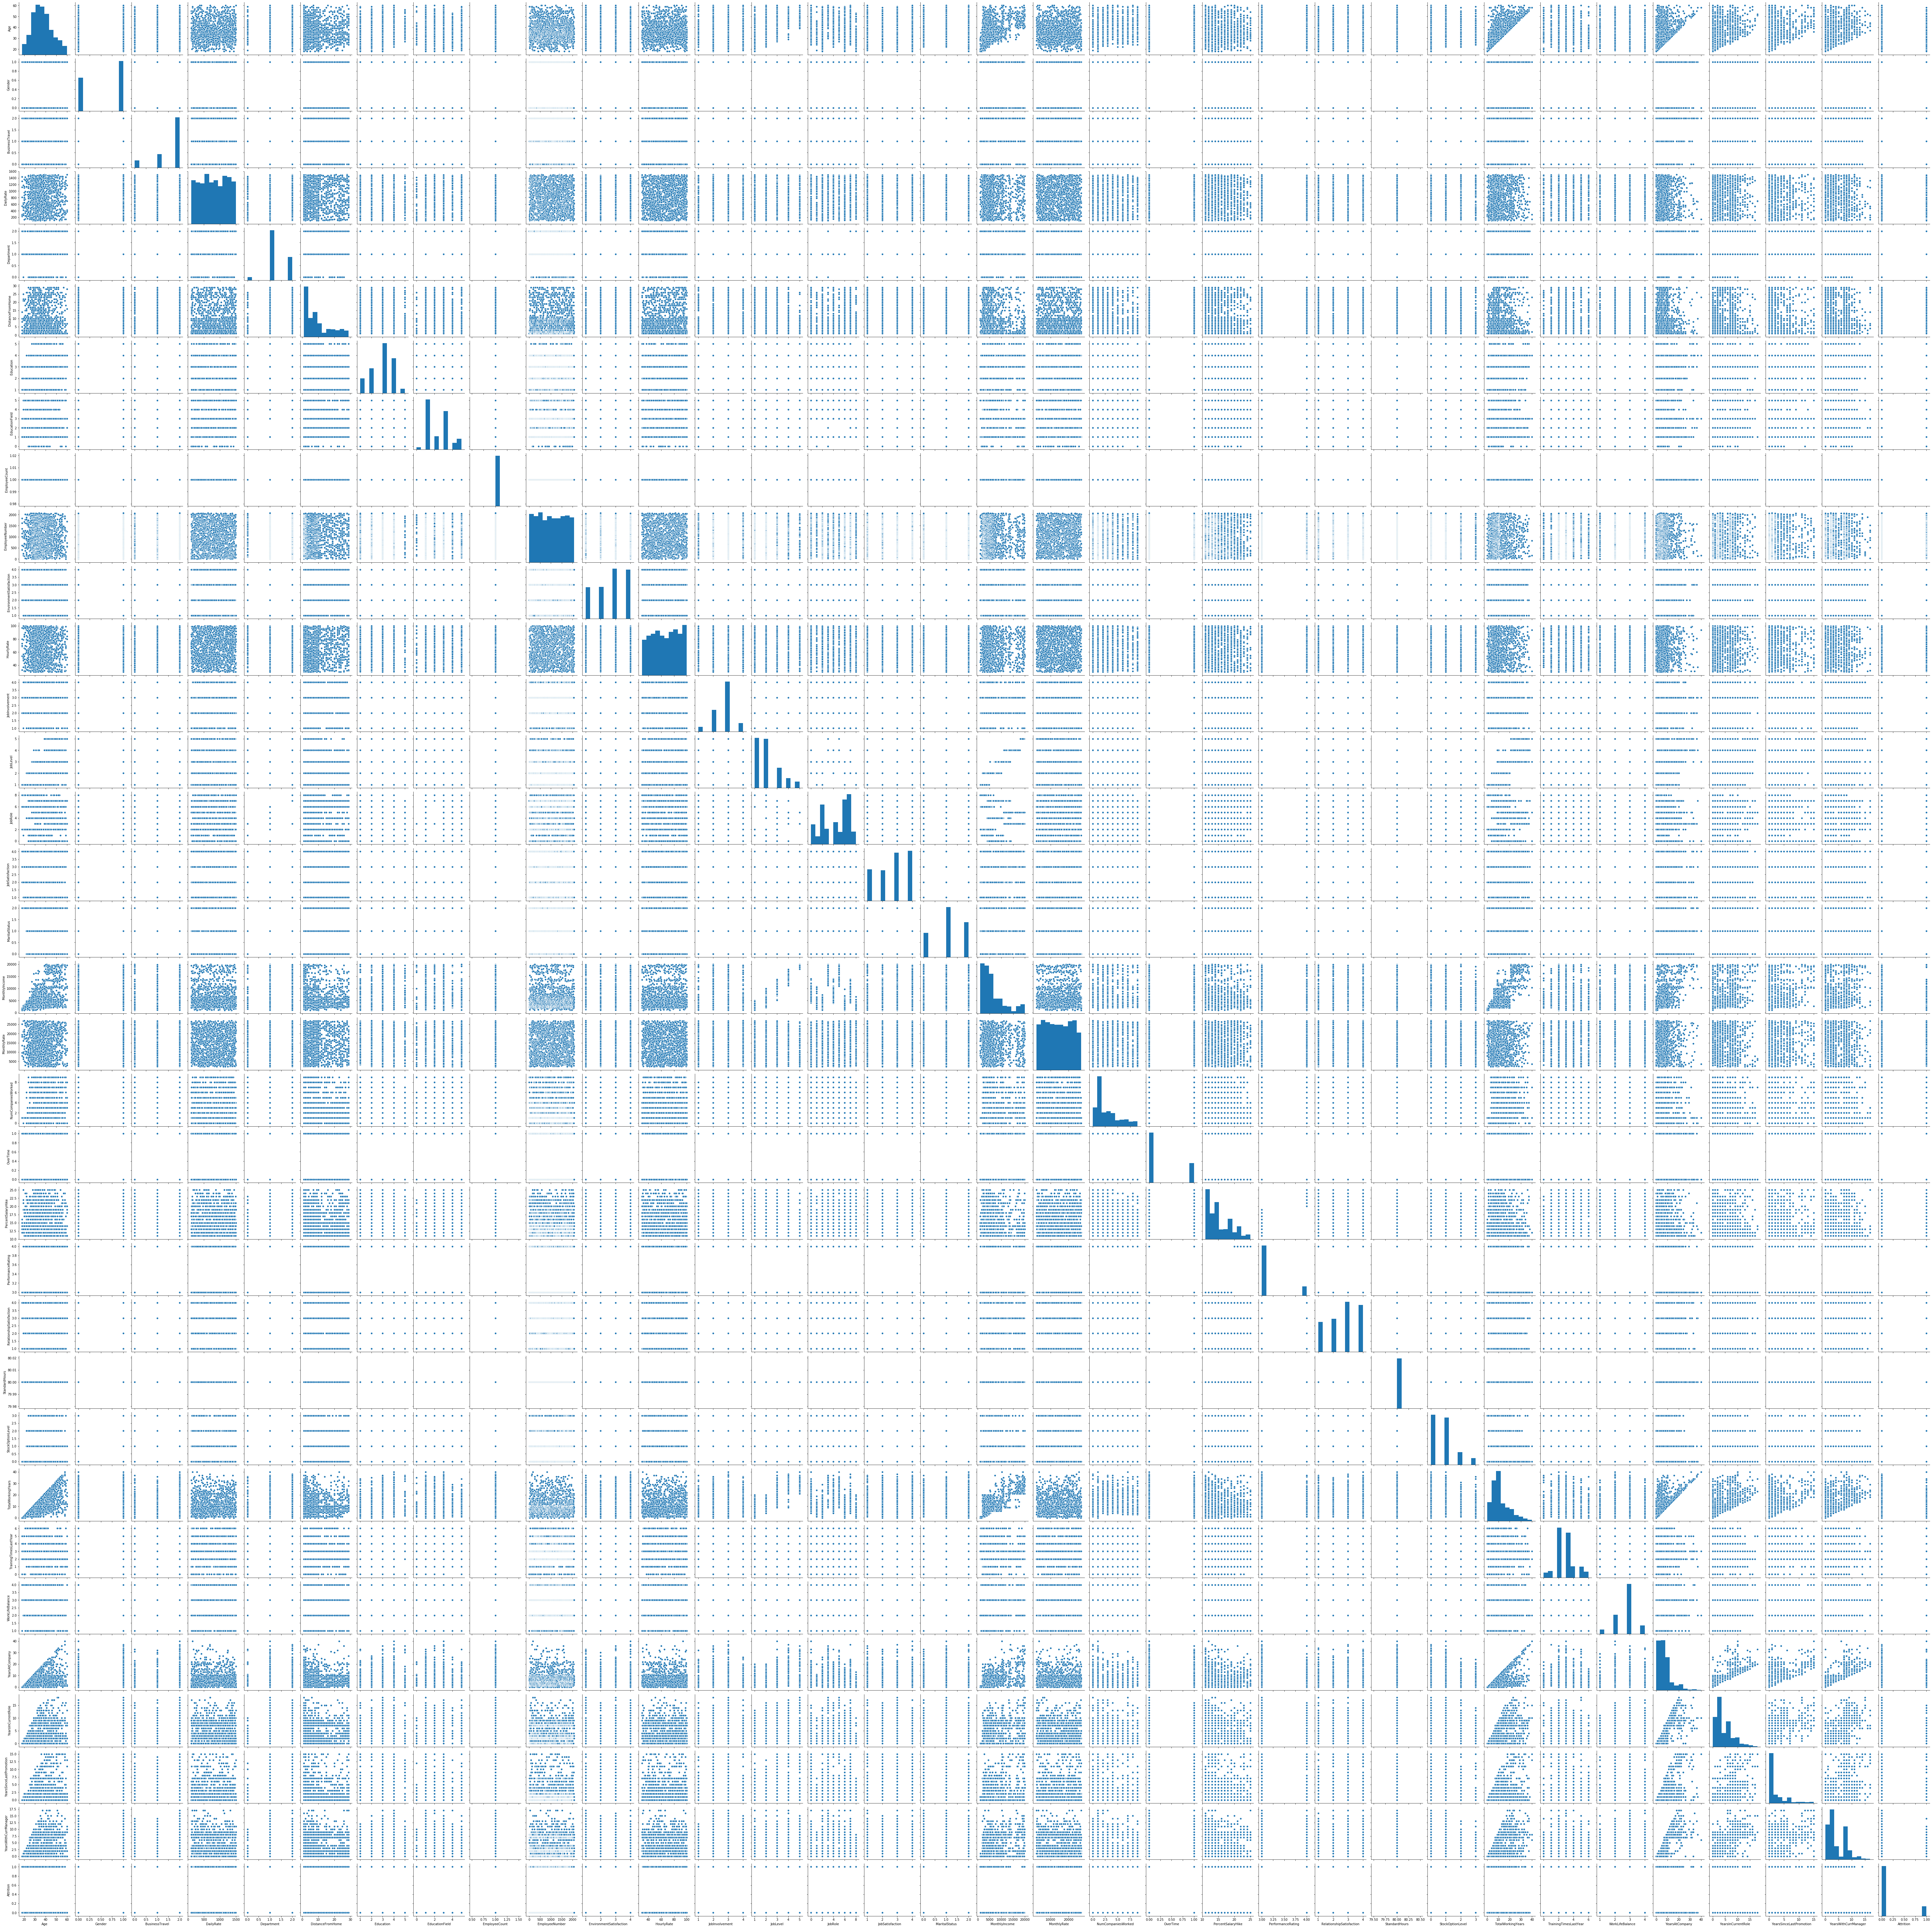

In [28]:
sns.pairplot(df)

Observation:
    From the above pairplot of dataset, we can see data distribution and correlation with eachother column datasets etc.

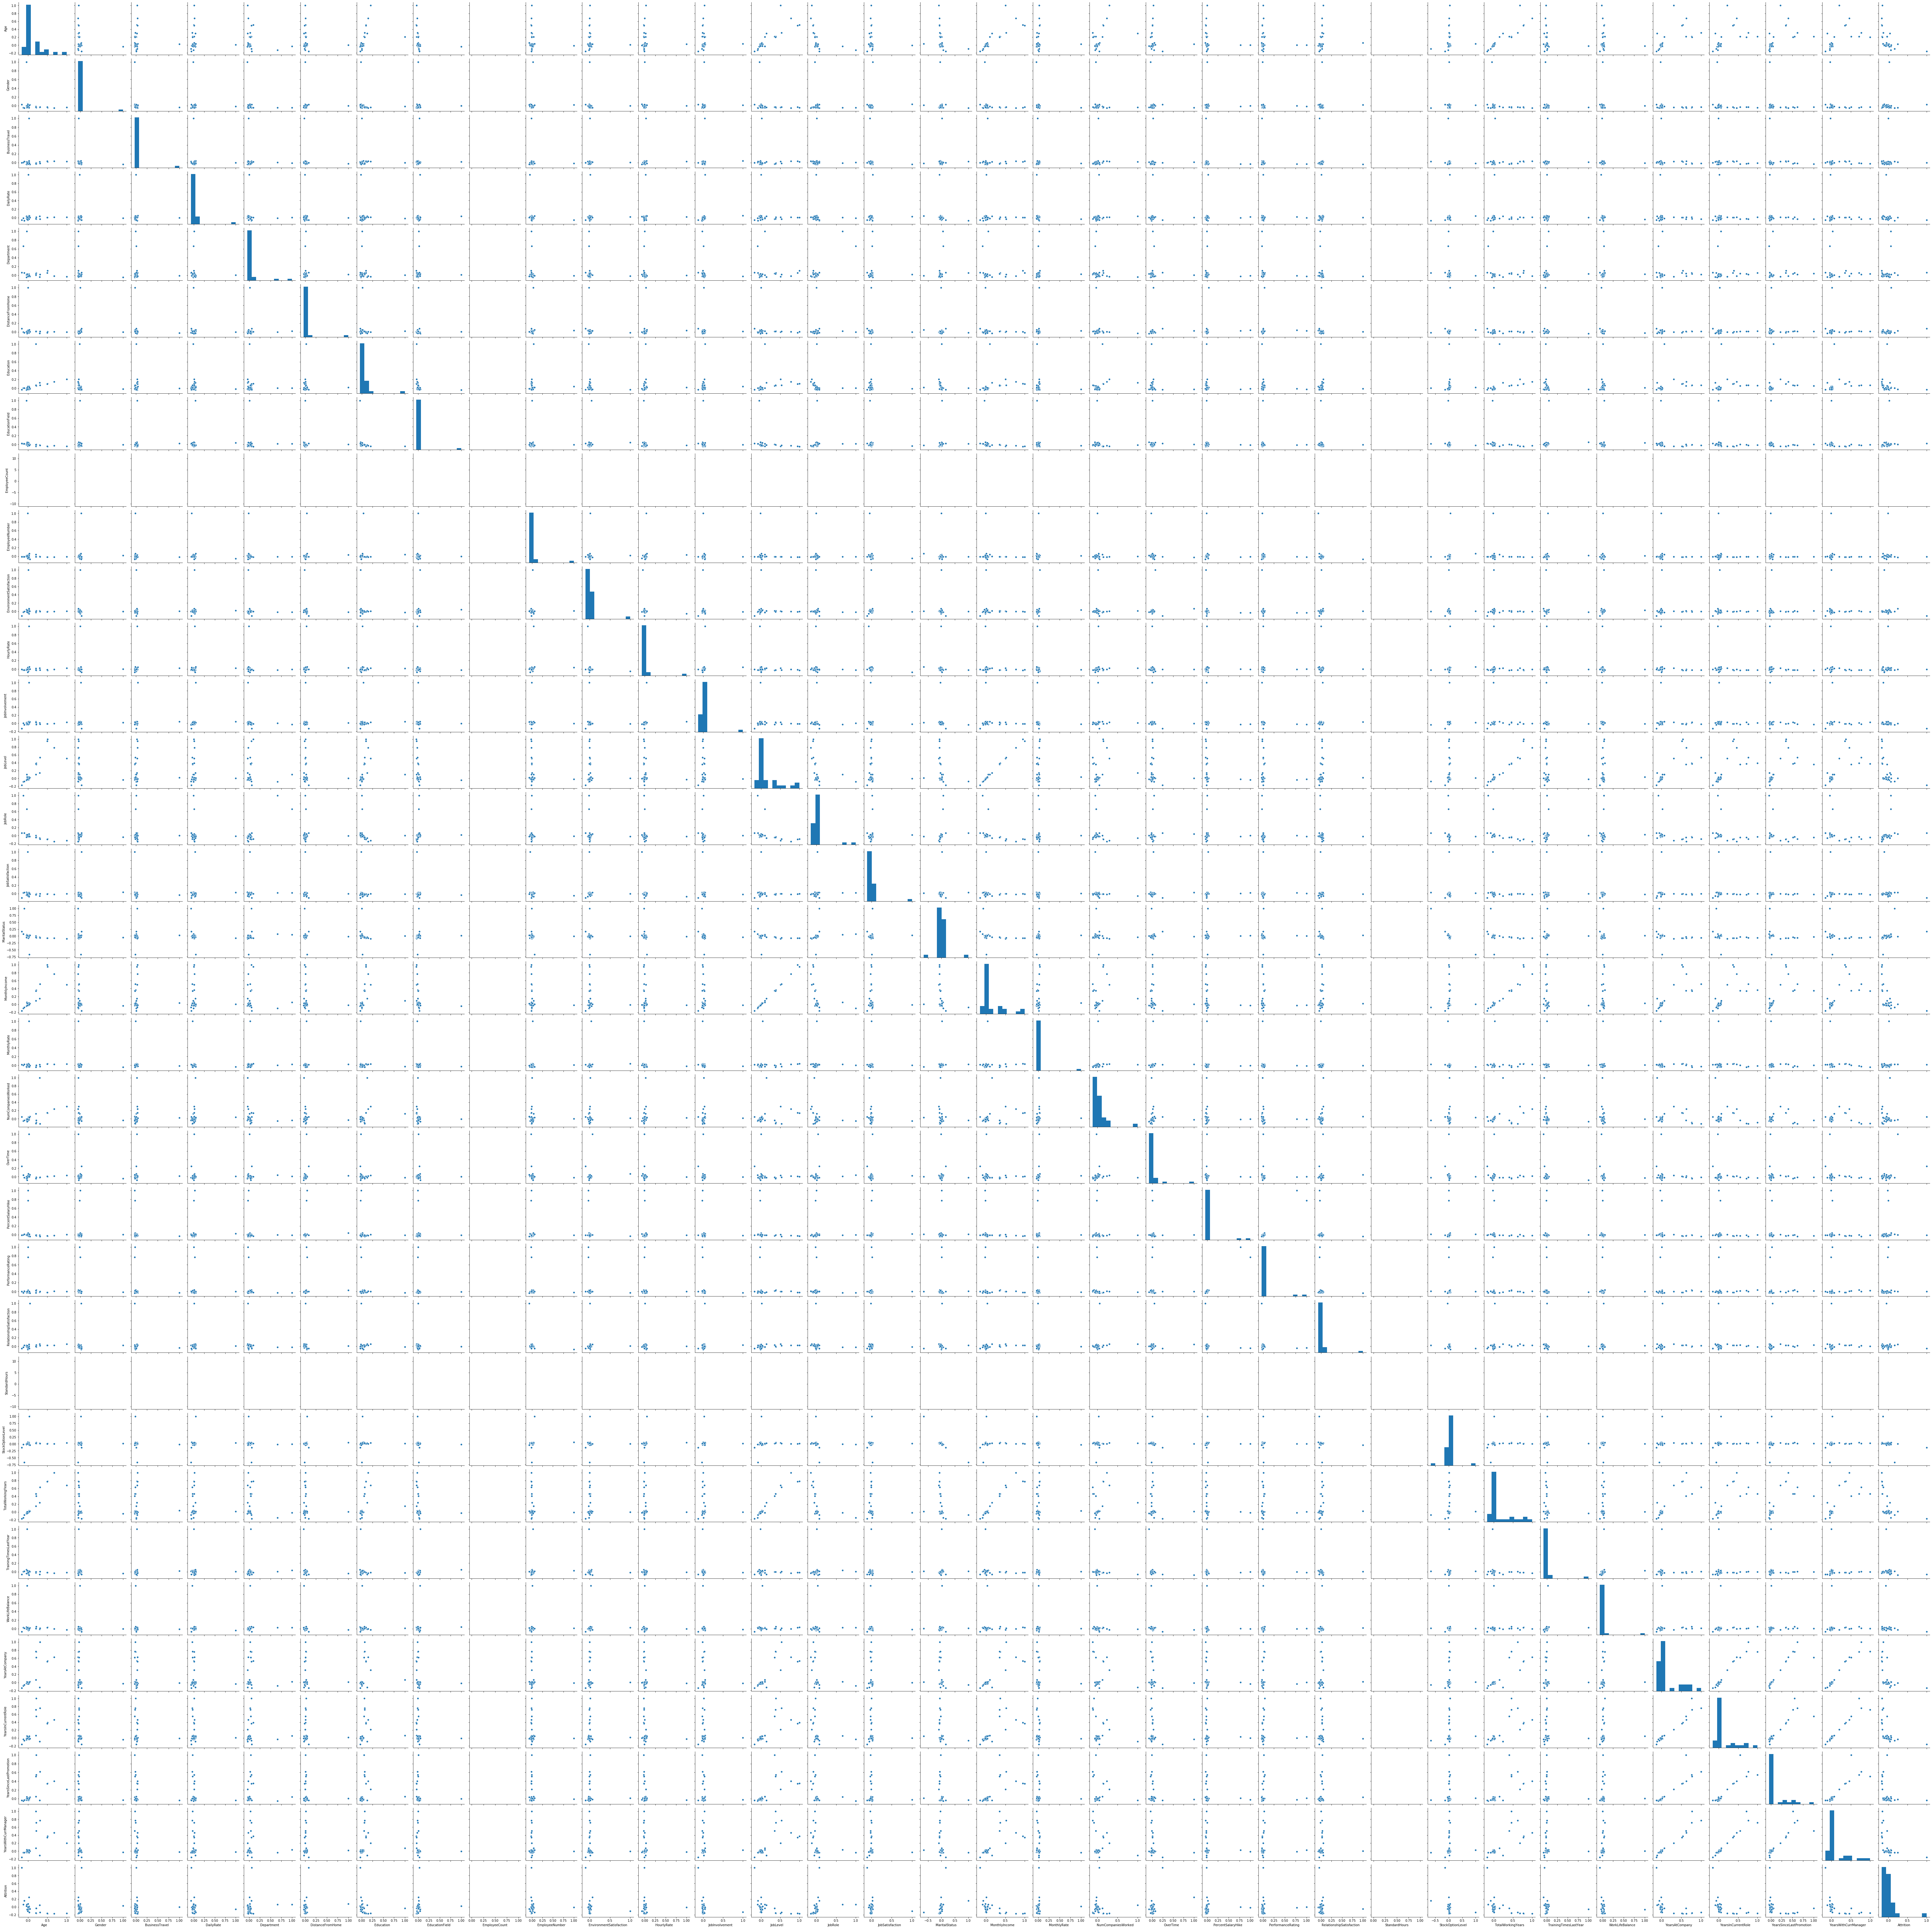

In [29]:
sns.pairplot(dscor)

Observation:
    From the above pairplot of correlation matrix, we can see data distribution, data correlation with eachother etc.

In [30]:
# checking columns headings:
df.columns


Index(['Age', 'Gender', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [32]:
# checking datatypes in all the columns.
df.dtypes

Age                         int64
Gender                      int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany

# REMOVING OUTLIERS:

In [33]:
# removing outliers with the help of zscore technique.

z=np.abs(zscore(df))
z

array([[0.4463504 , 1.22474487, 0.59004834, ..., 0.67914568, 0.24583399,
        2.28090588],
       [1.32236521, 0.81649658, 0.91319439, ..., 0.36871529, 0.80654148,
        0.4384223 ],
       [0.008343  , 0.81649658, 0.59004834, ..., 0.67914568, 1.15593471,
        2.28090588],
       ...,
       [1.08667552, 0.81649658, 0.59004834, ..., 0.67914568, 0.31487349,
        0.4384223 ],
       [1.32236521, 0.81649658, 0.91319439, ..., 0.67914568, 1.08689522,
        0.4384223 ],
       [0.32016256, 0.81649658, 0.59004834, ..., 0.36871529, 0.59522723,
        0.4384223 ]])

In [34]:
threshold = 3
print(np.where(z>threshold))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([32, 31, 29, 31, 30, 31, 26, 26, 29, 31, 30, 31, 32, 26, 29, 31, 32,
       31, 26, 32, 29, 30, 31, 30, 32, 29, 31, 26, 29, 30, 31, 31, 32, 26,
       29, 29, 31, 31, 26, 30, 29, 29, 31, 29, 32, 31, 29, 26, 29, 31, 32,
       26, 32, 29, 31, 

In [35]:
df_new = df[(z<3).all(axis=1)]
df_new

Empty DataFrame
Columns: [Age, Gender, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition]
Index: []

[0 rows x 34 columns]

# OBSERVATION:

Observation: After removing outliers we can see that we are loosing almost all of the data, so we can say that here in this dataset, outliers are internal property, so it cannot be removed.

In [37]:
# creating x,y dataset for further model building.
x = df.iloc[:,0:33]
y = df.iloc[:,-1]

In [38]:
x.shape

(1470, 33)

In [39]:
y.shape

(1470,)

In [40]:
x.columns

Index(['Age', 'Gender', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# SCALING THE DATASET:

In [41]:
#Scaling the dataset::
sc = StandardScaler()
x_scaled= sc.fit_transform(x)
columnslist = ['Age', 'Gender', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'] 

X = pd.DataFrame(x_scaled, columns = columnslist)
X

Age    Gender  BusinessTravel  DailyRate  Department  \
0     0.446350 -1.224745        0.590048   0.742527    1.401512   
1     1.322365  0.816497       -0.913194  -1.297775   -0.493817   
2     0.008343  0.816497        0.590048   1.414363   -0.493817   
3    -0.429664 -1.224745       -0.913194   1.461466   -0.493817   
4    -1.086676  0.816497        0.590048  -0.524295   -0.493817   
...        ...       ...             ...        ...         ...   
1465 -0.101159  0.816497       -0.913194   0.202082   -0.493817   
1466  0.227347  0.816497        0.590048  -0.469754   -0.493817   
1467 -1.086676  0.816497        0.590048  -1.605183   -0.493817   
1468  1.322365  0.816497       -0.913194   0.546677    1.401512   
1469 -0.320163  0.816497        0.590048  -0.432568   -0.493817   

      DistanceFromHome  Education  EducationField  EmployeeCount  \
0            -1.010909  -0.891688       -0.937414            0.0   
1            -0.147150  -1.868426       -0.937414            0.0   
2            -0.887515  -0.891688        1.316673            0.0   
3            -0.764121   1.061787       -0.937414            0.0   
4            -0.887515  -1.868426        0.565311            0.0   
...                ...        ...             ...            ...   
1465          1.703764  -0.891688        0.565311            0.0   
1466         -0.393938  -1.868426        0.565311            0.0   
1467         -0.640727   0.085049       -0.937414            0.0   
1468         -0.887515   0.085049        0.565311            0.0   
1469         -0.147150   0.085049        0.565311            0.0   

      EmployeeNumber  ...  RelationshipSatisfaction  StandardHours  \
0          -1.701283  ...                 -1.584178            0.0   
1          -1.699621  ...                  1.191438            0.0   
2          -1.696298  ...                 -0.658973            0.0   
3          -1.694636  ...                  0.266233            0.0   
4          -1.691313  ...                  1.191438            0.0   
...              ...  ...                       ...            ...   
1465        1.721670  ...                  0.266233            0.0   
1466        1.723332  ...                 -1.584178            0.0   
1467        1.726655  ...                 -0.658973            0.0   
1468        1.728317  ...                  1.191438            0.0   
1469        1.733302  ...                 -1.584178            0.0   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0            -0.932014          -0.421642              -2.171982   
1             0.241988          -0.164511               0.155707   
2            -0.932014          -0.550208               0.155707   
3            -0.932014          -0.421642               0.155707   
4             0.241988          -0.678774               0.155707   
...                ...                ...                    ...   
1465          0.241988           0.735447               0.155707   
1466          0.241988          -0.293077               1.707500   
1467          0.241988          -0.678774              -2.171982   
1468         -0.932014           0.735447               0.155707   
1469         -0.932014          -0.678774               0.155707   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0           -2.493820       -0.164613           -0.063296   
1            0.338096        0.488508            0.764998   
2            0.338096       -1.144294           -1.167687   
3            0.338096        0.161947            0.764998   
4            0.338096       -0.817734           -0.615492   
...               ...             ...                 ...   
1465         0.338096       -0.327893           -0.615492   
1466         0.338096       -0.001333            0.764998   
1467         0.338096       -0.164613           -0.615492   
1468        -1.077862        0.325228            0.488900   
1469         1.754054       -0.491174           -0.339394   

In [42]:
X.shape

(1470, 33)

In [43]:
y.shape

(1470,)

In [44]:
#Before Balancing the dataset

y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

Observation: We can see that our dataset is very much imbalanced, which is not good for the model building. so we'll balanced the dataset using SMOTE technique.

# BALANCING THE DATASET:

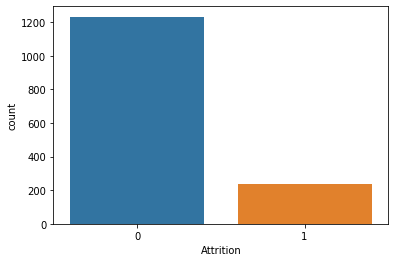

In [45]:
#plotting the imbalanced dataset:

import seaborn as sns
ax = sns.countplot(x='Attrition', data = df)


In [46]:
SM = SMOTE()
x_over, y_over = SM.fit_resample(X, y)

In [47]:
x_over.shape

(2466, 33)

In [48]:
y_over.shape

(2466,)

In [49]:
#After Balancing the dataset

y_over.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

Observation:
    After using SMOTE technique, we have over sampled the least categorical data values to balance the datasets.

In [50]:
#creating train test dataset from the x and y part inorder to start model making.

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=.20, random_state=43)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1972, 33)
(1972,)
(494, 33)
(494,)


# LOGISTICS REGRESSION:

In [51]:
# Logistic Regression:

lg = LogisticRegression()
lg.fit(x_train, y_train)
pred = lg.predict(x_test)
print('accuracy score - ', accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

accuracy score -  0.7834008097165992
[[181  51]
 [ 56 206]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       232
           1       0.80      0.79      0.79       262

    accuracy                           0.78       494
   macro avg       0.78      0.78      0.78       494
weighted avg       0.78      0.78      0.78       494



Checking over fitting of the model using cross validation score:

In [52]:
print(cross_val_score(lg, x_over, y_over, cv=5).mean())

0.7481953831372001


# GAUSSIAN NB CLASSIFIER METHOD:

In [53]:
#As there are two target categories present in target column i.e. 'Attrition' column.
# We can use GaussianNB algorithm for model making.

gnb = GaussianNB()
gnb.fit(x_train, y_train)
predg = gnb.predict(x_test)
print(accuracy_score(y_test, predg))
print(confusion_matrix(y_test, predg))
print(classification_report(y_test, predg))

0.7145748987854251
[[144  88]
 [ 53 209]]
              precision    recall  f1-score   support

           0       0.73      0.62      0.67       232
           1       0.70      0.80      0.75       262

    accuracy                           0.71       494
   macro avg       0.72      0.71      0.71       494
weighted avg       0.72      0.71      0.71       494



Checking over fitting of the model using cross validation score:

In [54]:
print(cross_val_score(gnb, x_over, y_over, cv=5).mean())

0.6869656979083689


# DECISION TREE CLASSIFIER METHOD:

In [55]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc = dtc.predict(x_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

0.8623481781376519
[[196  36]
 [ 32 230]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       232
           1       0.86      0.88      0.87       262

    accuracy                           0.86       494
   macro avg       0.86      0.86      0.86       494
weighted avg       0.86      0.86      0.86       494



Checking over fitting of the model using cross validation score:

In [56]:
print(cross_val_score(dtc, x_over, y_over, cv=5).mean())

0.7117901635036257


# RANDON FOREST CLASSIFIER METHOD:

In [57]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.9433198380566802
[[225   7]
 [ 21 241]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       232
           1       0.97      0.92      0.95       262

    accuracy                           0.94       494
   macro avg       0.94      0.94      0.94       494
weighted avg       0.94      0.94      0.94       494



Checking over fitting of the model using cross validation score:

In [58]:
print(cross_val_score(rf, x_over, y_over, cv=5).mean())

0.8455560026607319


# ADA BOOST CLASSIFIER METHOD:

In [59]:
ad = AdaBoostClassifier(n_estimators=100)
ad.fit(x_train, y_train)
pred=ad.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.9311740890688259
[[211  21]
 [ 13 249]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       232
           1       0.92      0.95      0.94       262

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494



Checking over fitting of the model using cross validation score:

In [60]:
print(cross_val_score(ad, x_over, y_over, cv=5).mean())

0.5975002258337371


# SUPPORT VECTOR CLASSIFIER METHOD:

In [61]:
sv = SVC()
sv.fit(x_train, y_train)
pred= sv.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.9048582995951417
[[199  33]
 [ 14 248]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       232
           1       0.88      0.95      0.91       262

    accuracy                           0.90       494
   macro avg       0.91      0.90      0.90       494
weighted avg       0.91      0.90      0.90       494



Checking over fitting of the model using cross validation score:

In [62]:
print(cross_val_score(sv, x_over, y_over, cv=5).mean())

0.8986343218007571


# OBSERVATION:

Observation:
Support vector classifier model is our best model, because difference between its accuracy score and cross validations score is least, which indicates least overfitting.


# HYPER PARAMETER TUNING OF MODEL:

In [63]:
parameters = {
    'kernel' : ['linear', 'rbf', 'poly'],
    'degree' : [2,3,4],
    'gamma' : ['scale', 'auto'],
    'max_iter' : [-1,1]}


In [64]:
# hyperparamter tuning with the help of Grid search CV technique.
GCV = GridSearchCV(SVC(), parameters, cv=5)


In [65]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'degree': [2, 3, 4], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly'],
                         'max_iter': [-1, 1]})

In [66]:
# checking best parameters:
GCV.best_params_

{'degree': 4, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1}

# FINAL MODEL MAKING:

In [67]:
sv_f = SVC(degree = 4, gamma = 'scale', kernel = 'poly', max_iter = -1)
sv_f.fit(x_train, y_train)
pred= sv_f.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.9068825910931174
[[208  24]
 [ 22 240]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       232
           1       0.91      0.92      0.91       262

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494



OBSERVATION: Our Final Model is having accuracy of 90.68 which has improved with fractions of decimal points.

# AUC ROC CURVE:

In [68]:
# false positive rate: fpr
# true positive rate: tpr
# AUC : Area under curve.
# ROC : Receiver operating characteristic.

fpr, tpr, thresholds = roc_curve(y_test, pred)

In [69]:
fpr

array([0.        , 0.10344828, 1.        ])

In [70]:
tpr

array([0.        , 0.91603053, 1.        ])

In [71]:
thresholds

array([2, 1, 0])

In [72]:
y_train_pred = sv_f.decision_function(x_train)    
y_test_pred = sv_f.decision_function(x_test) 

In [73]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


In [74]:
print("area under curve (auc): ", metrics.roc_auc_score(y_test, pred))

area under curve (auc):  0.906291129244538


Observation:
AUC curve value is 0.90 which is very a good value, which indicates our model is very well built.

# PLOTTING AUC ROC CURVE:

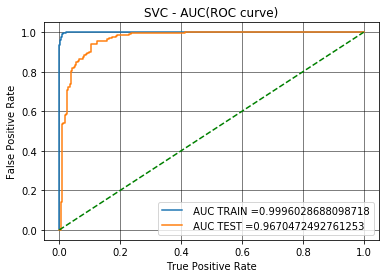

In [75]:
from sklearn.metrics import roc_curve, auc

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("SVC - AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

Observation:
    AUC Test curve is very well built, almost close to the AUC train, curve is having characteristics of sudden curvature, which indicates, a good AUC curve, and very well model building.

# SAVING MODEL:

In [76]:
import joblib
joblib.dump(sv_f, 'Vaibhav_HR_Analytics_Project_Model.pkl')

['Vaibhav_HR_Analytics_Project_Model.pkl']

# RELOADING MODEL:

In [77]:
#Reloading the model and predicting the dataset.
HR_Analytics_Project_Model = joblib.load('Vaibhav_HR_Analytics_Project_Model.pkl')
HR_Analytics_Project_Model.predict(x_train)

array([1, 1, 0, ..., 1, 1, 0])

CONCUSION:

    Our model is very well performing with an accuracy score of 90.68 % accuracy.

# THANK YOU